<a href="https://colab.research.google.com/github/surajacharya12/data-science-/blob/main/Another_copy_of_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats
import google.generativeai as genai
import re
import os


# 3. Exploratory Data Analysis (EDA) and Visualization
 We'll explore basic statistics and visualize the data.**bold text**

# 3. Exploratory Data Analysis (EDA) and Visualization
 We'll explore basic statistics and visualize the data.**bold text**

# Step 1: Load the Dataset
First, we need to load the dataset into a Pandas DataFrame.

In [ ]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv"
data = pd.read_csv(url)

In [ ]:
data.head()


,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


# Step 2: Data Cleaning
Data cleaning involves handling missing values, removing duplicates, and ensuring data types are correct.


In [ ]:
# Check for missing values, duplicates, and data types
missing_values = data.isnull().sum()

duplicates = data.duplicated().sum()

data_types = data.dtypes

missing_values, duplicates, data_types

(Country      0
 Continent    0
 Region       0
 DevName      0
 1980         0
 1981         0
 1982         0
 1983         0
 1984         0
 1985         0
 1986         0
 1987         0
 1988         0
 1989         0
 1990         0
 1991         0
 1992         0
 1993         0
 1994         0
 1995         0
 1996         0
 1997         0
 1998         0
 1999         0
 2000         0
 2001         0
 2002         0
 2003         0
 2004         0
 2005         0
 2006         0
 2007         0
 2008         0
 2009         0
 2010         0
 2011         0
 2012         0
 2013         0
 Total        0
 dtype: int64,
 0,
 Country      object
 Continent    object
 Region       object
 DevName      object
 1980          int64
 1981          int64
 1982          int64
 1983          int64
 1984          int64
 1985          int64
 1986          int64
 1987          int64
 1988          int64
 1989          int64
 1990          int64
 1991          int64
 1992          int64


If there are any missing values, we will fill them or drop the rows. If there are duplicates, we will remove them.


1.We identify numeric columns using select_dtypes() and apply .fillna() to them.
2.For categorical columns (like "Country" or "Region"), we fill missing values with the most frequent value (mode).
3.Finally, we drop any duplicates from the datas

In [ ]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

data.drop_duplicates(inplace=True)


<ipython-input-5-7673697eb828>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mode()[0], inplace=True)


This section cleans the data by:


1.   Checking for missing values, duplicates, and data types.
2.   Filling missing numeric values with the mean.







3.   Filling missing categorical values with the mode.
2.   Removing duplicate rows.



# 3. Exploratory Data Analysis (EDA) and Visualization
 We'll explore basic statistics and visualize the data.**bold text**

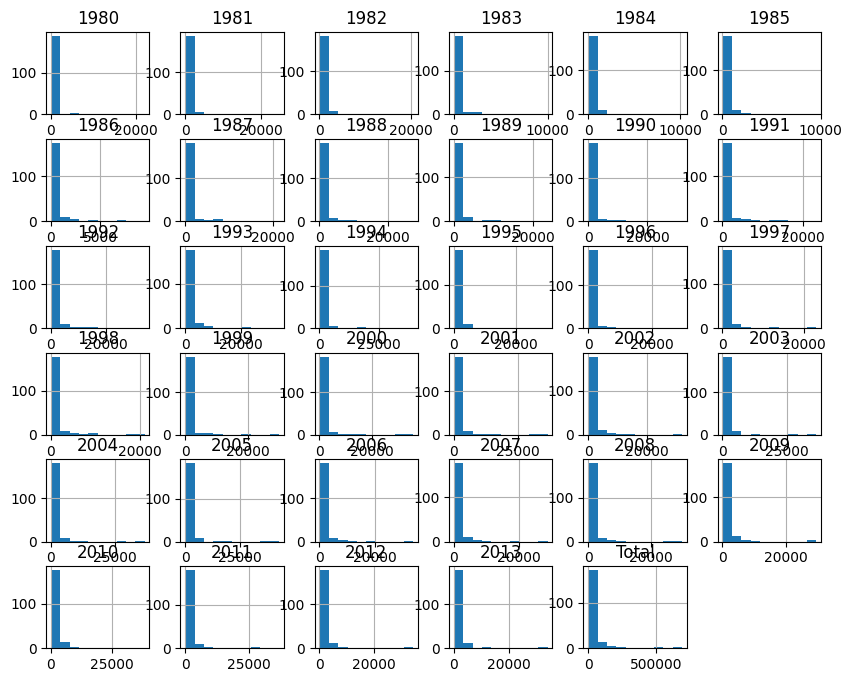

In [ ]:
# Basic statistics
summary_stats = data.describe()

# Basic statistics
data.hist(figsize=(10, 8))
plt.show()


Correlation heatmap


In [ ]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])


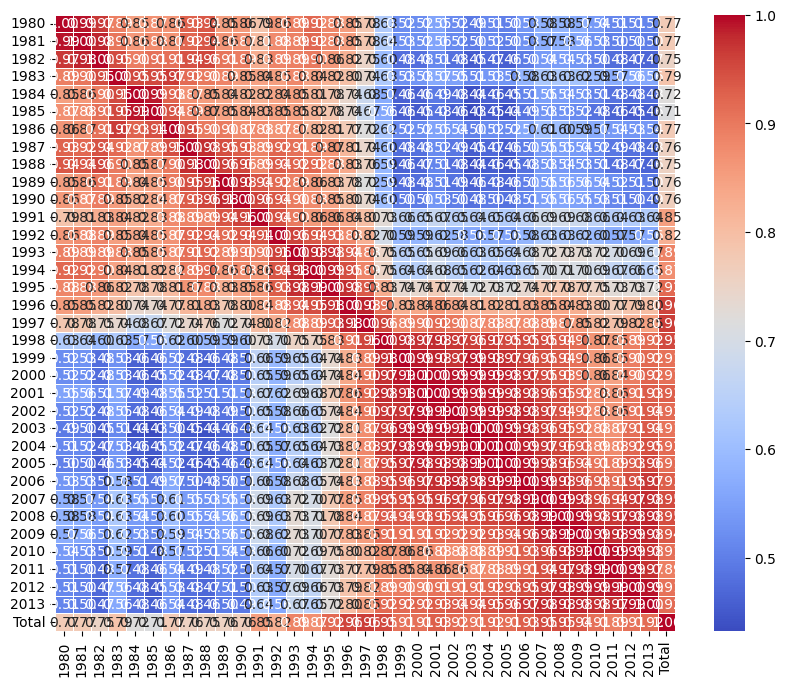

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

This part explores the data using:



1.   This part explores the data using:


2.  This part explores the data using:




3.   This part explores the data using:




# 4. Feature Engineering
We can create new features or transform existing ones, such as extracting the year or month from a datetime column if available.


In [ ]:
data.columns, data.head()


(Index(['Country', 'Continent', 'Region', 'DevName', '1980', '1981', '1982',
        '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
        '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
        '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
        '2010', '2011', '2012', '2013', 'Total'],
       dtype='object'),
           Country Continent           Region             DevName  1980  1981  \
 0     Afghanistan      Asia    Southern Asia  Developing regions    16    39   
 1         Albania    Europe  Southern Europe   Developed regions     1     0   
 2         Algeria    Africa  Northern Africa  Developing regions    80    67   
 3  American Samoa   Oceania        Polynesia  Developing regions     0     1   
 4         Andorra    Europe  Southern Europe   Developed regions     0     0   
 
    1982  1983  1984  1985  ...  2005  2006  2007  2008  2009  2010  2011  \
 0    39    47    71   340  ...  3436  3009 

# 5. Hypothesis Testing
For hypothesis testing, let's assume we want to test if there is a significant difference between the 'Income' in different regions or any other variable.


# **5.1**. T-test (Independent)
A T-test is used to compare the means of two independent groups to see if there is a statistically significant difference between them.

In [ ]:
data.columns


Index(['Country', 'Continent', 'Region', 'DevName', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', 'Total'],
      dtype='object')

In [ ]:
year_1980 = data['1980']
year_1981 = data['1981']

t_stat, p_value = stats.ttest_ind(year_1980, year_1981)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -0.28173465803033004, P-value: 0.7782971792422846


## 5.2. Z-test
A Z-test is used when you want to compare sample means to a population mean, assuming the sample size is large (n > 30) or the population variance is known.

In [ ]:
population_mean = 50000

sample = data['Total']



In [ ]:
sample_mean = np.mean(sample)
sample_std = np.std(sample)
sample_size = len(sample)

In [ ]:
z_score = (sample_mean - population_mean) / (sample_std / np.sqrt(sample_size))

In [ ]:
p_value = stats.norm.cdf(z_score)

In [ ]:
print(f"Z-score: {z_score}, P-value: {p_value}")

Z-score: -2.6132541574459016, P-value: 0.0044842290236033365


# 5.3. ANOVA (Analysis of Variance)
ANOVA is used when comparing means across more than two groups. If you want to compare the mean "Income" across multiple regions, you can use ANOVA.

In [ ]:
regions = data['Region'].unique()
total_by_region = [data[data['Region'] == region]['Total'] for region in regions]

In [ ]:
f_stat, p_value = stats.f_oneway(*total_by_region)
print(f"F-statistic: {f_stat}, P-value: {p_value}")

F-statistic: 1.7263418240330972, P-value: 0.03065250057438756


# Example using ANOVA to compare multiple years (e.g., from 1980 to 2000):

In [ ]:
years = [str(year) for year in range(1980, 2001)]

data_years = [data[year] for year in years]

In [ ]:
f_stat, p_value = stats.f_oneway(*data_years)

print(f"F-statistic: {f_stat}, P-value: {p_value}")

F-statistic: 2.0744640684807507, P-value: 0.0033376734030870023


In [ ]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv"
df = pd.read_csv(url)

# Clean the column names (strip spaces, lowercase them)


In [ ]:
df.columns = df.columns.str.strip().str.lower()


# Print column names to debug


In [ ]:
print("Column Names:", df.columns)


Column Names: Index(['country', 'continent', 'region', 'devname', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', 'total'],
      dtype='object')


# Inspect the first few rows of the dataframe


In [ ]:
print("First few rows of the dataset:")
print(df.head())


First few rows of the dataset:
          country continent           region             devname  1980  1981  \
0     Afghanistan      Asia    Southern Asia  Developing regions    16    39   
1         Albania    Europe  Southern Europe   Developed regions     1     0   
2         Algeria    Africa  Northern Africa  Developing regions    80    67   
3  American Samoa   Oceania        Polynesia  Developing regions     0     1   
4         Andorra    Europe  Southern Europe   Developed regions     0     0   

   1982  1983  1984  1985  ...  2005  2006  2007  2008  2009  2010  2011  \
0    39    47    71   340  ...  3436  3009  2652  2111  1746  1758  2203   
1     0     0     0     0  ...  1223   856   702   560   716   561   539   
2    71    69    63    44  ...  3626  4807  3623  4005  5393  4752  4325   
3     0     0     0     0  ...     0     1     0     0     0     0     0   
4     0     0     0     0  ...     0     1     1     0     0     0     0   

   2012  2013  total  
0  2635 